In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [30]:
import tensorflow as tf

a=tf.constant([2.0,3.0,4.0],shape=[1,3],name='a')
b=tf.constant([11.0,12.0,13.0],shape=[1,3],name='b')

with tf.name_scope("Xmean"):      
        x=tf.reduce_mean(a)
        sess=tf.Session()
        print(sess.run(x))

with tf.name_scope("Ymean"):
        y=tf.reduce_mean(b)
        sess=tf.Session()
        print(sess.run(y))
        
with tf.name_scope("Variance"):
        d=tf.subtract(a,x)
        sess=tf.Session()
        print(sess.run(d ))

        e=tf.square(d)
        f=tf.reduce_sum(e)
        sess=tf.Session()
        print(sess.run(f))



3.0
12.0
[[-1.  0.  1.]]
2.0


In [31]:
with tf.name_scope("Covariance"):
    g=tf.subtract(b,y)
    sess=tf.Session()
    g=tf.multiply(d,g)
    h=tf.reduce_sum(g)
    print(sess.run(h))



2.0


In [32]:
with tf.name_scope("C"):
    j=tf.divide(h,f)
    print(sess.run(j))

1.0


In [33]:
with tf.name_scope("m"):
    writer=tf.summary.FileWriter('/home/phani',sess.graph)
    i=tf.multiply(j,x)
    k=tf.subtract(y,i)
    print(sess.run(k))

9.0


# Part B
### RMSE calculation and plotting of actual values vs predicted values 

In [34]:
with tf.name_scope("root_mean_square_error"):
    tmp=tf.subtract(b,y)
    tmp1=tf.multiply(tmp, tmp)
    sumoftmp1=tf.reduce_sum(tmp1)
    tmp2=tf.divide(sumoftmp1, 3,)
    RMSE=tf.sqrt(tmp2)
    print (sess.run(RMSE))

0.816497


In [38]:

with tf.Session() as sess:
    x_values=sess.run(a)
    y_values=sess.run(b)
X = np.asarray(x_values)
Y = np.asarray(y_values)

x_values_FOR_prediction=tf.constant([3.0,5.0, 7.0, 8.0, 9.0])
with tf.Session() as sess:
    tmp3=sess.run(x_values_FOR_prediction)
x_values_FOR_prediction_1=np.asarray(tmp3)

y_array=[0]*5
    
with tf.Session() as sess:
        for i in range(len(sess.run(x_values_FOR_prediction))):
            curr = sess.run(x_values_FOR_prediction[i])
            a=tf.multiply(curr,j)
            b=tf.add(a,k)
            y_array[i]=sess.run(b)
print(y_array)


[12.0, 14.0, 16.0, 17.0, 18.0]


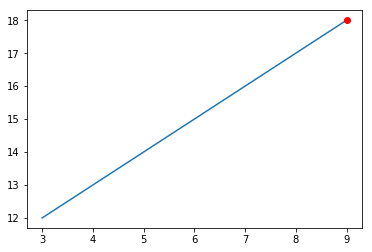

/home/phani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [48]:

plt.plot(x_values_FOR_prediction_1, y_array, label='fitted line')
plt.plot(X,Y,'ro',label='Actual values')
plt.show()
plt.legend()